In [8]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
filename = 'latent2_1_eta_1.0_gamma_6.4_zDim_2_lrVAE_0.0001_lrD_0.0001_rseed_0_run_2'
file_path = f'src/bfvae0/records/{filename}.txt'

# Initialize lists to hold the values
vae_loss_list = []
dis_loss_list = []
recon_list = []
kl_list = []
tc_list = []
pv_reg_list = []
pv_values = []
metric1_values = []
metric2_values = []

# Regular expression patterns to extract the losses
vae_loss_pattern = re.compile(r'vae_loss:\s([\d\.]+)')
dis_loss_pattern = re.compile(r'dis_loss:\s([\d\.]+)')
recon_pattern = re.compile(r'recon:\s([\d\.]+)')
kl_pattern = re.compile(r'kl:\s([\d\.]+)')
tc_pattern = re.compile(r'tc:\s([-]*[\d\.]+)')
pv_reg_pattern = re.compile(r'pv_reg:\s([\d\.]+)')
pv_pattern = re.compile(r'pv = \[([0-9\.\s]+)\]')
metric1_pattern = re.compile(r'metric1\s*=\s*([\d\.]+)')
metric2_pattern = re.compile(r'metric2\s*=\s*([\d\.]+)')

# Read the file and extract the values
with open(file_path, 'r') as file:
    for line in file:
        vae_loss_match = vae_loss_pattern.search(line)
        if vae_loss_match:
            vae_loss_list.append(float(vae_loss_match.group(1)))

        dis_loss_match = dis_loss_pattern.search(line)
        if dis_loss_match:
            dis_loss_list.append(float(dis_loss_match.group(1)))

        recon_match = recon_pattern.search(line)
        if recon_match:
            recon_list.append(float(recon_match.group(1)))

        kl_match = kl_pattern.search(line)
        if kl_match:
            kl_list.append(float(kl_match.group(1)))

        tc_match = tc_pattern.search(line)
        if tc_match:
            tc_list.append(float(tc_match.group(1)))

        pv_reg_match = pv_reg_pattern.search(line)
        if pv_reg_match:
            pv_reg_list.append(float(pv_reg_match.group(1)))

        pv_match = pv_pattern.search(line)
        if pv_match:
            pv_str = pv_match.group(1)
            pv_list = [float(val) for val in pv_str.split()]
            pv_values.append(pv_list)
            
        metric1_match = metric1_pattern.search(line)
        if metric1_match:
            metric1_values.append(float(metric1_match.group(1)))

        metric2_match = metric2_pattern.search(line)
        if metric2_match:
            metric2_values.append(float(metric2_match.group(1)))

In [9]:
from scipy.ndimage import gaussian_filter1d

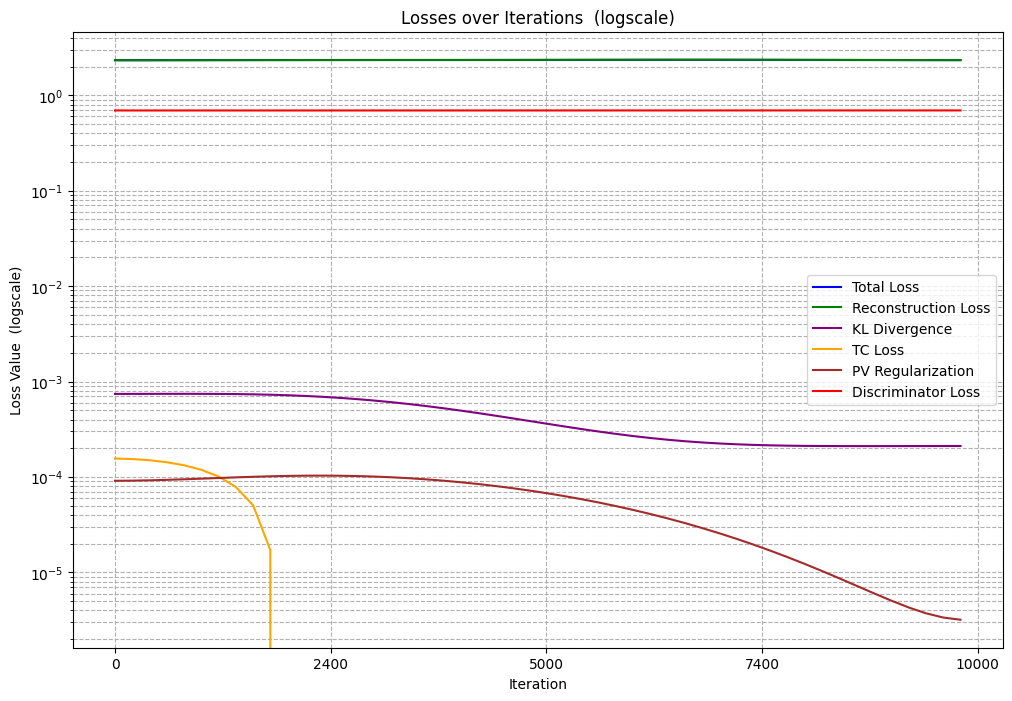

In [15]:
loss_iter_intv = 200
loss_iter_max = loss_iter_intv*len(recon_list)

plt.figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(vae_loss_list, 10)[0:], label='Total Loss', color='blue')
plt.plot(gaussian_filter1d(recon_list, 10)[0:], label='Reconstruction Loss', color='green')
plt.plot(gaussian_filter1d(kl_list, 10)[0:], label='KL Divergence', color='purple')
plt.plot(gaussian_filter1d(tc_list, 10)[0:], label='TC Loss', color='orange')
plt.plot(gaussian_filter1d(pv_reg_list, 10)[0:], label='PV Regularization', color='brown')
plt.plot(gaussian_filter1d(dis_loss_list, 10)[0:], label='Discriminator Loss', color='red')

is_log = True
plt.xlabel('Iteration')
if is_log:
    plt.yscale('log')
log_suffix = ' (logscale)' if is_log else ''
plt.ylabel(f'Loss Value {log_suffix}')
plt.title(f'Losses over Iterations {log_suffix}')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.xticks(ticks=np.linspace(0, loss_iter_max//loss_iter_intv, 5), labels=[str(x * loss_iter_intv) for x in np.linspace(0, loss_iter_max//loss_iter_intv, 5,dtype=int)])
plt.show()

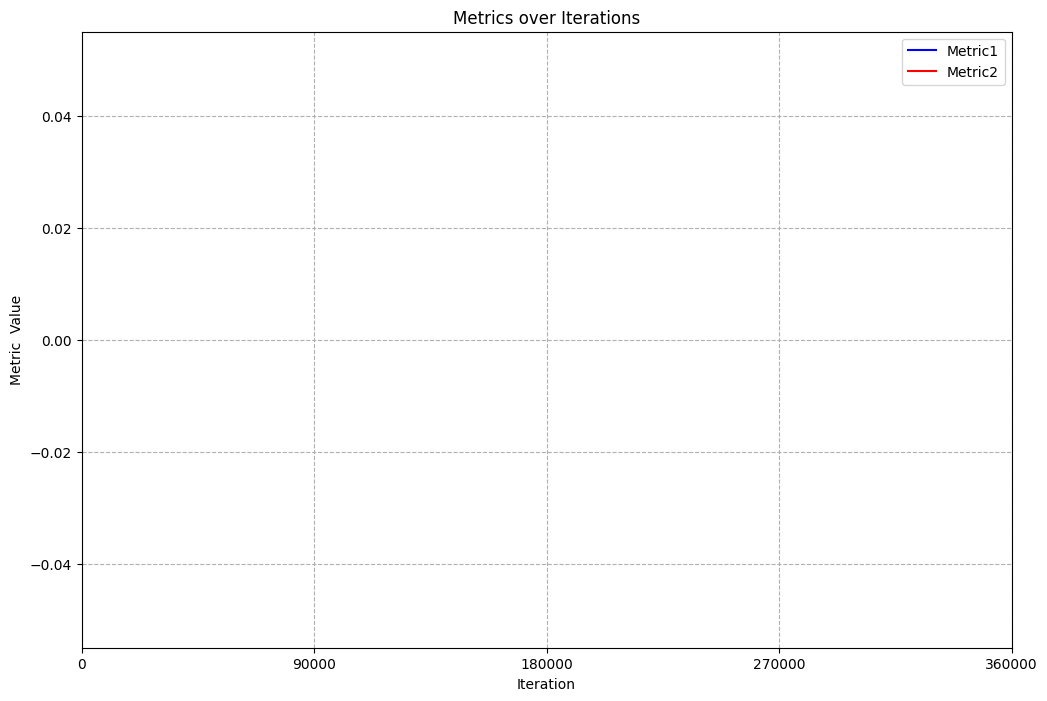

In [11]:
plt.figure(figsize=(12, 8))

plt.plot(gaussian_filter1d(metric1_values,10), label='Metric1', color='blue')
plt.plot(gaussian_filter1d(metric2_values,10), label='Metric2', color='red')

plt.xlabel('Iteration')
plt.ylabel('Metric  Value')
plt.title('Metrics over Iterations')
plt.legend()
plt.grid(True, which="both", ls="--")

iter_freq = 50
plt.xticks(ticks=np.linspace(0, 360_000//iter_freq, 5), labels=[str(x * iter_freq) for x in np.linspace(0, 360_000//iter_freq, 5,dtype=int)])
plt.show()

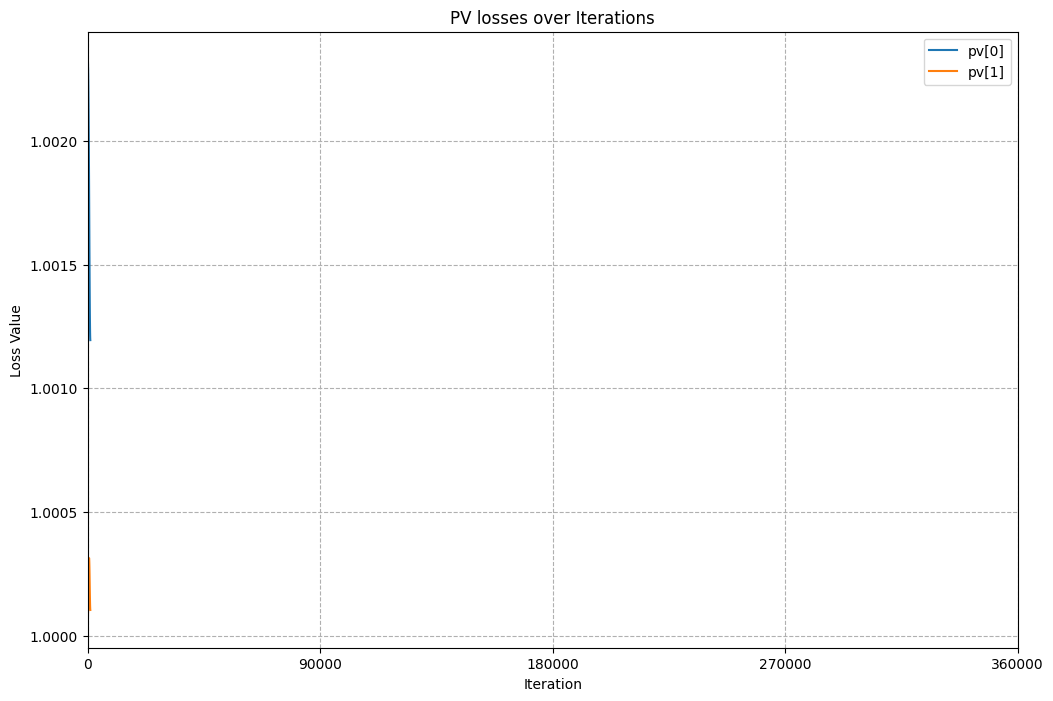

In [12]:
plt.figure(figsize=(12, 8))

for pv_i in range(len(pv_values[0])):
    smoothed_sig = gaussian_filter1d(np.array(pv_values)[:,pv_i], 20)
    plt.plot(smoothed_sig, label=f'pv[{pv_i}]')

plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title('PV losses over Iterations')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.xticks(ticks=np.linspace(0, 18_000, 5), labels=[str(x * 20) for x in np.linspace(0, 18_000, 5,dtype=int)])
plt.show()